In [2]:
# %pip install bing-image-downloader

In [3]:
# from bing_image_downloader import downloader

In [4]:
# downloader.download(
#         "mango",
#         limit=100,
#         output_dir="./mango",
#         adult_filter_off=True,
#         force_replace=False,
#         timeout=60,
#         verbose=True,
#     )

In [5]:
# downloader.download(
#     "strawberry",
#     limit=100,
#     output_dir="./strawberry",
#     adult_filter_off=True,
#     force_replace=False,
#     timeout=60,
#     verbose=True,
# )

In [7]:
mango_path="E:/ML/ML assignments/ML-assignment-4/mango/mango"
strawberry_path="E:\ML\ML assignments\ML-assignment-4\strawberry\strawberry"


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Shivam Kumar\AppData\Local\Temp\ipykernel_12476\1866634196.py:2: SyntaxWarning: invalid escape sequence '\M'
  strawberry_path="E:\ML\ML assignments\ML-assignment-4\strawberry\strawberry"


In [10]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import shuffle


In [ ]:
# organize dataset into a useful structure

# create directories
dataset_home = "dataset_mangoes_vs_strawberries/"
subdirs = ["train/", "test/"]
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ["mangoes/", "strawberries/"]
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(49)
# define ratio of pictures to use for validation
val_ratio = 0.20
# copy training dataset images into subdirectories
src_directories = [
    mango_path,
    strawberry_path,
]
for src_directory in src_directories:
    i = 1
    files = os.listdir(src_directory)
    shuffle(files)
    for file in files:
        src = src_directory + "/" + file
        dst_dir = "train/"
        if i > 80:
            dst_dir = "test/"
        if file.startswith("strawberry"):
            dst = dataset_home + dst_dir + "strawberries/" + file
            copyfile(src, dst)
        elif file.startswith("mango"):
            dst = dataset_home + dst_dir + "mangoes/" + file
            copyfile(src, dst)
        i += 1

In [10]:
# import shutil
# shutil.rmtree('/content/dataset_dogs_vs_horses')

In [11]:
# shutil.rmtree('/content/mango')
# shutil.rmtree('/content/strawberry')

In [12]:
from matplotlib import pyplot
from matplotlib.image import imread


# define location of dataset
def plot_images(folder, animal_name):
    files = os.listdir(folder)
    # plot first few images
    i = 0
    for file_name in files[:9]:
        pyplot.suptitle(animal_name)
        pyplot.subplot(330 + 1 + i)
        image = imread(os.path.join(folder, file_name))
        # plot raw pixel data
        pyplot.imshow(image)
        i += 1
    # show the figure
    pyplot.show()

In [4]:
dataset_train_path="E:/ML/ML assignments/ML-assignment-4/dataset_mangoes_vs_strawberries/train"
dataset_test_path="E:/ML/ML assignments/ML-assignment-4/dataset_mangoes_vs_strawberries/test"

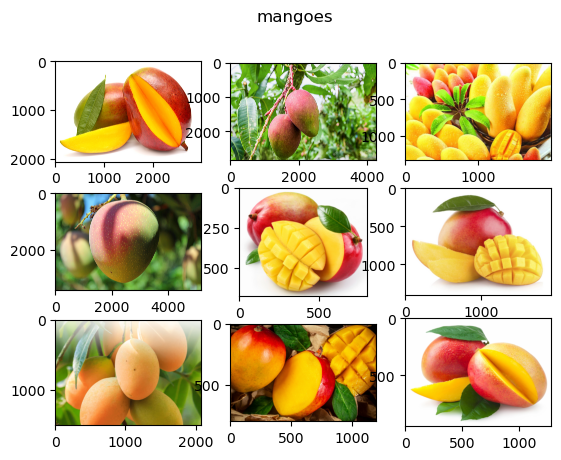

In [14]:


plot_images(dataset_train_path+"/mangoes", "mangoes")

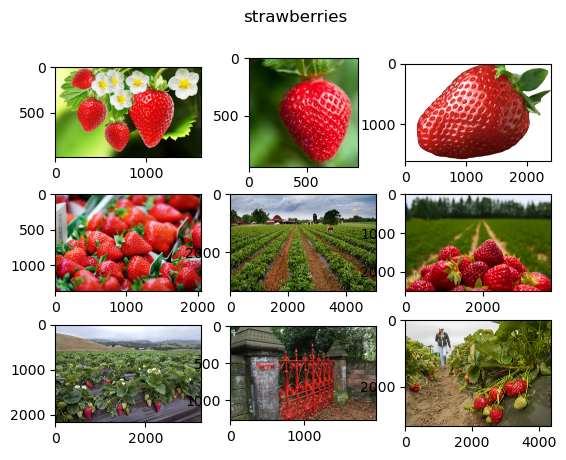

In [15]:
plot_images(dataset_train_path+"/strawberries", "strawberries")

In [16]:
folder = dataset_train_path
for file in listdir(folder):
    print(file)

mangoes
strawberries


In [15]:
# load mangoes vs strawberries dataset, reshape and save to a new file
from os import listdir
import os
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


def pre_processing(src_folder):
    photos, labels = list(), list()
    # enumerate files in the directory
    for folder in listdir(src_folder):
        folder_path = os.path.join(src_folder, folder)
        for file in listdir(folder_path):
            # determine class
            output = 0.0
            if file.startswith("mango"):
                output = 1.0
            # load image
            photo = load_img(os.path.join(folder_path, file), target_size=(200, 200))
            # convert to numpy array
            photo = img_to_array(photo)
            # store
            photos.append(photo)
            labels.append(output)
    # convert to a numpy arrays
    photos = asarray(photos)
    labels = asarray(labels)
    print(photos.shape, labels.shape)
    # save the reshaped photos
    if "train" in src_folder:
        save("mango_vs_strawberry_photos.npy", photos)
        save("mango_vs_strawberry_labels.npy", labels)
    else:
        save("mango_vs_strawberry_photos.npy", photos)
        save("mango_vs_strawberry_labels.npy", labels)

In [6]:
src_folder_train = dataset_train_path
src_folder_test = dataset_test_path

In [16]:
pre_processing(src_folder_train)
pre_processing(src_folder_test)

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(480, 200, 200, 3) (480,)
(120, 200, 200, 3) (120,)


In [20]:
for folder in listdir(src_folder_train):
    folder_path = os.path.join(src_folder_train, folder)
    i = 0
    print(folder_path)
    for file in listdir(folder_path):
        i += 1
    print(i)

for folder in listdir(src_folder_test):
    folder_path = os.path.join(src_folder_test, folder)
    i = 0
    print(folder_path)
    for file in listdir(folder_path):
        i += 1
    print(i)

E:/ML/ML assignments/ML-assignment-4/dataset_mangoes_vs_strawberries/train\mangoes
240
E:/ML/ML assignments/ML-assignment-4/dataset_mangoes_vs_strawberries/train\strawberries
240
E:/ML/ML assignments/ML-assignment-4/dataset_mangoes_vs_strawberries/test\mangoes
60
E:/ML/ML assignments/ML-assignment-4/dataset_mangoes_vs_strawberries/test\strawberries
60


In [22]:
import tensorflow as tf

In [19]:

# baseline model for the mangoes vs strawberries dataset
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from time import time
import numpy as np
from tqdm.keras import TqdmCallback
from keras.callbacks import TensorBoard, Callback
from matplotlib import pyplot
import tensorflow as tf

# Define a function to set up the TensorBoard callback
def setup_tensorboard():
    return TensorBoard(
        log_dir="./logs", histogram_freq=1, write_graph=True, write_images=True)


class PerIterationCallback(Callback):
    def __init__(self, logdir, test_iterator):
        self.logdir = logdir
        self.writer = tf.summary.create_file_writer(logdir)
        self.step = 0
        self.test_iterator = test_iterator

    def on_batch_end(self, batch_index, logs=None):
        if logs is not None:
            with self.writer.as_default():
                tf.summary.scalar(
                    "training_loss_vs_iterations", logs["loss"], step=self.step
                )
                tf.summary.scalar(
                    "training_accuracy_vs_iterations", logs["accuracy"], step=self.step
                )
                # Write image summaries
                self.write_image_summaries()
                self.writer.flush()
                self.step += 1

    def write_image_summaries(self):
        if self.step % 100 == 0:  # Adjust the frequency of writing image summaries as needed
            test_images, test_labels = next(iter(self.test_iterator))
            predicted_labels = self.model.predict(test_images)
            with self.writer.as_default():
                tf.summary.image(
                    "Test Images vs Predictions",
                    test_images,
                    step=self.step,
                    max_outputs=20,  # Number of images to display
                )

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title("Cross Entropy Loss")
    pyplot.plot(history.history["loss"], color="blue", label="train")
    pyplot.plot(history.history["val_loss"], color="orange", label="test")
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title("Classification Accuracy")
    pyplot.plot(history.history["accuracy"], color="blue", label="train")
    pyplot.plot(history.history["val_accuracy"], color="orange", label="test")

    pyplot.tight_layout()
    pyplot.show()


# run the test harness for evaluating a model
def run_test_harness():
    start_time = time()
    # define model
    model = define_model()
    log_dir = './logs/' + model.name + '_image_label'
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(
        dataset_train_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    test_it = datagen.flow_from_directory(
        dataset_test_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    per_iteration_callback = PerIterationCallback(tensorboard_callback.log_dir, test_it)
    # fit model
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=6,
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )

    # End time for training measurement
    training_time = time() - start_time
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]

    # evaluate model
    _, test_acc = model.evaluate(
        test_it,
        steps=len(test_it),
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )
    print("> %.6f" % (test_acc * 100.0))

    # Count the number of trainable parameters in the model
    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )

    model_results = {
        "Model": model.name,  # Get model name from type
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Trainable Parameters": trainable_params,
    }

    # Append results to a global DataFrame (assuming one exists)
    global model_performance_df
    model_performance_df = model_performance_df._append(
        model_results, ignore_index=True
    )

    # learning curves
    summarize_diagnostics(history)
    return model

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

> 75.000000


C:\Users\Shivam Kumar\AppData\Local\Temp\ipykernel_11940\2340690120.py:136: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df = model_performance_df._append(


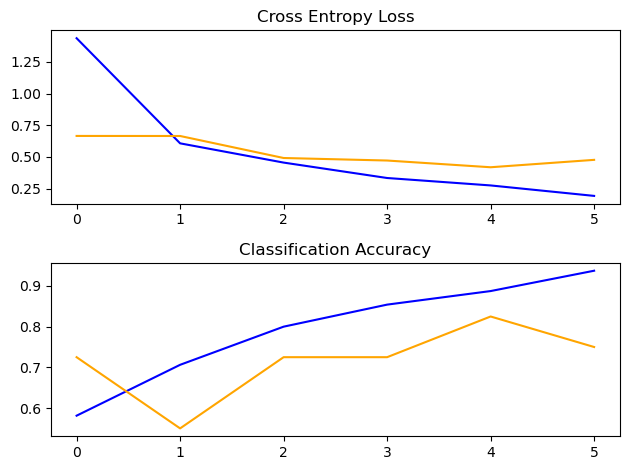

In [20]:
# define cnn model
def define_model():
    model = Sequential(name="vgg_1_block")
    model.add(
        Conv2D(
            32,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
            input_shape=(200, 200, 3),
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(1, activation="sigmoid"))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.5)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


model_performance_df = pd.DataFrame(
    columns=[
        "Model",
        "Training Time (s)",
        "Training Loss",
        "Training Accuracy",
        "Testing Accuracy",
        "Trainable Parameters",
    ]
)

vgg1=run_test_harness()

In [ ]:
#Blue line represents training loss
#Orange line represents validation loss

In [21]:

# baseline model for the mangoes vs strawberries dataset
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from time import time
from tqdm.keras import TqdmCallback
from keras.callbacks import TensorBoard, Callback


# Define a function to set up the TensorBoard callback
def setup_tensorboard():
    return TensorBoard(
        log_dir="./logs", histogram_freq=1, write_graph=True, write_images=True)


class PerIterationCallback(Callback):
    def __init__(self, logdir):
        self.logdir = logdir
        self.writer = tf.summary.create_file_writer(logdir)
        self.step = 0

    def on_batch_end(self, batch_index, logs=None):
        if logs is not None:
            with self.writer.as_default():
                tf.summary.scalar(
                    "training_loss_vs_iterations", logs["loss"], step=self.step
                )
                tf.summary.scalar(
                    "training_accuracy_vs_iterations", logs["accuracy"], step=self.step
                )
                self.writer.flush()
                self.step += 1


# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title("Cross Entropy Loss")
    pyplot.plot(history.history["loss"], color="blue", label="train")
    pyplot.plot(history.history["val_loss"], color="orange", label="test")
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title("Classification Accuracy")
    pyplot.plot(history.history["accuracy"], color="blue", label="train")
    pyplot.plot(history.history["val_accuracy"], color="orange", label="test")

    pyplot.tight_layout()
    pyplot.show()


# run the test harness for evaluating a model
def run_test_harness():
    start_time = time()
    # define model
    model = define_model()
    log_dir = './logs/' + model.name
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    per_iteration_callback = PerIterationCallback(tensorboard_callback.log_dir)
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(
        dataset_train_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    test_it = datagen.flow_from_directory(
        dataset_test_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    # fit model
    history = model.fit(
        train_it,
        steps_per_epoch=len(train_it),
        validation_data=test_it,
        validation_steps=len(test_it),
        epochs=6,
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )

    # End time for training measurement
    training_time = time() - start_time
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]

    # evaluate model
    _, test_acc = model.evaluate(
        test_it,
        steps=len(test_it),
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )
    print("> %.6f" % (test_acc * 100.0))

    # Count the number of trainable parameters in the model
    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )

    model_results = {
        "Model": model.name,  # Get model name from type
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Trainable Parameters": trainable_params,
    }

    # Append results to a global DataFrame (assuming one exists)
    global model_performance_df
    model_performance_df = model_performance_df._append(
        model_results, ignore_index=True
    )

    # learning curves
    summarize_diagnostics(history)
    return model

Two Block VGG Model

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Shivam Kumar\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

> 94.999999


C:\Users\Shivam Kumar\AppData\Local\Temp\ipykernel_11940\3269970232.py:122: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df = model_performance_df._append(


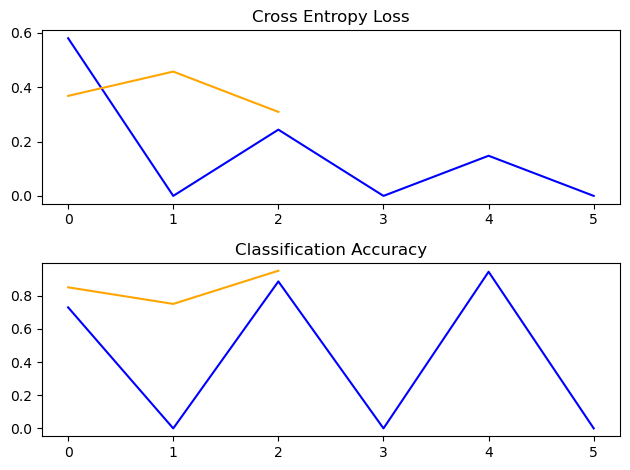

In [22]:
# define cnn model
def define_model():
    model = Sequential(name="vgg_2_block")
    model.add(
        Conv2D(
            32,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
            input_shape=(200, 200, 3),
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(1, activation="sigmoid"))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


model_performance_df = pd.DataFrame(
    columns=[
        "Model",
        "Training Time (s)",
        "Training Loss",
        "Training Accuracy",
        "Testing Accuracy",
        "Trainable Parameters",
    ]
)

vgg2=run_test_harness()

Three Block VGG Model

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Shivam Kumar\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

> 72.500002


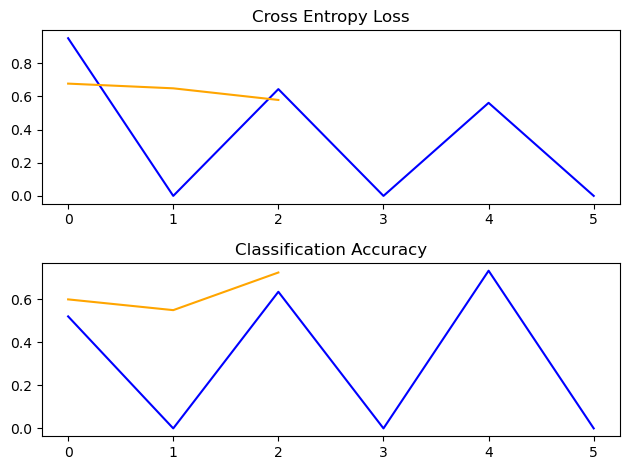

<Sequential name=vgg_3block, built=True>

In [ ]:
# define cnn model
def define_model():
    model = Sequential(name="vgg_3block")
    model.add(
        Conv2D(
            32,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
            input_shape=(200, 200, 3),
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(
        Conv2D(
            64,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(
        Conv2D(
            128,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(1, activation="sigmoid"))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.5)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


vgg3=run_test_harness()

VGG3 + Data Augmentation

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Shivam Kumar\anaconda3\Lib\contextlib.py:

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

> 87.500000


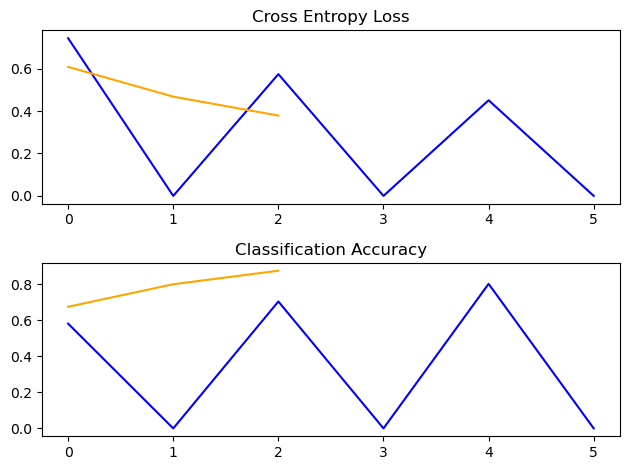

In [ ]:

# baseline model with data augmentation for the mangoes vs strawberries dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# define cnn model
def define_model():
    model = Sequential(name="vgg_3blocks_data_aug")
    model.add(
        Conv2D(
            32,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
            input_shape=(200, 200, 3),
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(
        Conv2D(
            64,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(
        Conv2D(
            128,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(1, activation="sigmoid"))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.5)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title("Cross Entropy Loss")
    pyplot.plot(history.history["loss"], color="blue", label="train")
    pyplot.plot(history.history["val_loss"], color="orange", label="test")
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title("Classification Accuracy")
    pyplot.plot(history.history["accuracy"], color="blue", label="train")
    pyplot.plot(history.history["val_accuracy"], color="orange", label="test")

    pyplot.tight_layout()

    pyplot.show()


def run_test_harness():
    start_time = time()
    # define model
    model = define_model()
    log_dir = './logs/' + model.name
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    per_iteration_callback = PerIterationCallback(tensorboard_callback.log_dir)
    # create data generator
    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255.0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
    )
    test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory(
        dataset_train_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    test_it = test_datagen.flow_from_directory(
        dataset_test_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    # fit model
    history = model.fit(
        train_it,
        steps_per_epoch=len(train_it),
        validation_data=test_it,
        validation_steps=len(test_it),
        epochs=6,
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )

    # End time for training measurement
    training_time = time() - start_time
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]

    # evaluate model
    _, test_acc = model.evaluate(
        test_it, steps=len(test_it), verbose=0, callbacks=[TqdmCallback()]
    )
    print("> %.6f" % (test_acc * 100.0))

    # Count the number of trainable parameters in the model
    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )

    model_results = {
        "Model": model.name,  # Get model name from type
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Trainable Parameters": trainable_params,
    }

    # Append results to a global DataFrame (assuming one exists)
    global model_performance_df
    model_performance_df = model_performance_df._append(
        model_results, ignore_index=True
    )

    # learning curves
    summarize_diagnostics(history)
    return model


# entry point, run the test harness
vgg3_data_aug=run_test_harness()

In [29]:
print(model_performance_df.to_string())

                  Model  Training Time (s)  Training Loss  Training Accuracy  Testing Accuracy Trainable Parameters
0           vgg_2_block         259.108709            0.0                0.0             0.925             20499649
1            vgg_3block         244.589426            0.0                0.0             0.725             10333505
2  vgg_3blocks_data_aug         273.015758            0.0                0.0             0.875             10333505


VGG19 Model with tuning all layers

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_137']. Received: the structure of inputs=*
  warnings.warn(
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Shivam Kumar\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_e

12/12 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.6617 - loss: 0.6759
> 75.000000


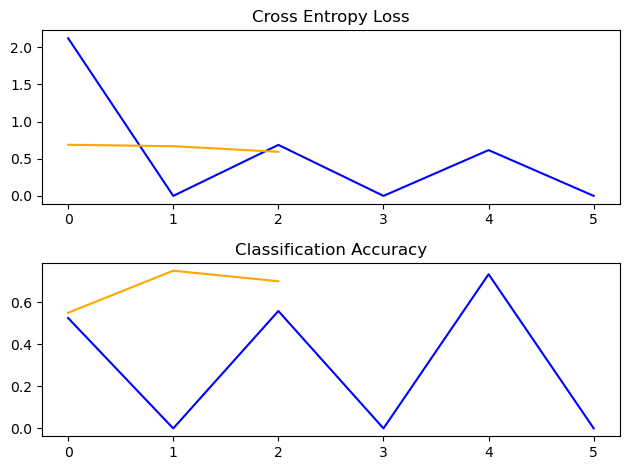

In [30]:

# vgg19 model used for transfer learning on the mangoes and strawberries dataset
import sys
from time import time
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping


# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title("Cross Entropy Loss")
    pyplot.plot(history.history["loss"], color="blue", label="train")
    pyplot.plot(history.history["val_loss"], color="orange", label="test")
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title("Classification Accuracy")
    pyplot.plot(history.history["accuracy"], color="blue", label="train")
    pyplot.plot(history.history["val_accuracy"], color="orange", label="test")

    pyplot.tight_layout()
    pyplot.show()


# run the test harness for evaluating a model

def run_test_harness():
    start_time = time()
    # Define model
    model = define_model()
    log_dir = './logs/' + 'vgg19_tuning_all_layers'
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
    
    # Create data generator with data augmentation
    train_datagen = ImageDataGenerator(
        featurewise_center=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
    )
    test_datagen = ImageDataGenerator(featurewise_center=True)
    
    # Specify imagenet mean values for centering
    train_datagen.mean = [123.68, 116.779, 103.939]
    test_datagen.mean = [123.68, 116.779, 103.939]
    
    # Prepare iterators
    train_it = train_datagen.flow_from_directory(
        dataset_train_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    test_it = test_datagen.flow_from_directory(
        dataset_test_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    
    # Fit model
    history = model.fit(
        train_it,
        steps_per_epoch=len(train_it),
        validation_data=test_it,
        validation_steps=len(test_it),
        epochs=6,
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, early_stopping_callback],
    )

    # End time for training measurement
    training_time = time() - start_time
    
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]
    
    # Evaluate model
    _, test_acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
    print("> %.6f" % (test_acc * 100.0))
    
    # Count the number of trainable parameters in the model
    trainable_params = model.count_params()
    
    # Create a dictionary to store results
    model_results = {
        "Model": 'vgg19_tuning_all_layers',
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Trainable Parameters": trainable_params,
    }
    
    # Append results to a global DataFrame (assuming one exists)
    global model_performance_df
    model_performance_df = model_performance_df._append(model_results, ignore_index=True)
    
    # Learning curves
    summarize_diagnostics(history)
    return model


# define cnn model
def define_model():
    # load model
    model = VGG19(include_top=False, input_shape=(200, 200, 3))
    # all layers trainable
    for layer in model.layers:
        layer.trainable = True
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
    output = Dense(1, activation="sigmoid")(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.5)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


# entry point, run the test harness
vgg19=run_test_harness()

VGG19 with tuning only the final MLP layers

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_162']. Received: the structure of inputs=*
  warnings.warn(
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Shivam Kumar\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_e

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

> 87.500000


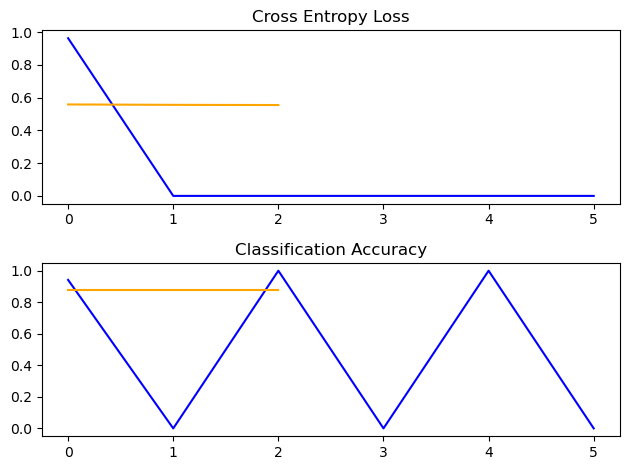

In [31]:

# vgg19 model used for transfer learning on the mangoes and strawberries dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def run_test_harness():
    start_time = time()
    # define model
    model = define_model()
    log_dir = './logs/' + 'vgg19_tuning_mlp'
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    per_iteration_callback = PerIterationCallback(tensorboard_callback.log_dir)
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(
        dataset_train_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    test_it = datagen.flow_from_directory(
        dataset_test_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    # fit model
    history = model.fit(
        train_it,
        steps_per_epoch=len(train_it),
        validation_data=test_it,
        validation_steps=len(test_it),
        epochs=6,
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )

    # End time for training measurement
    training_time = time() - start_time
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]
    # evaluate model
    _, test_acc = model.evaluate(
        test_it, steps=len(test_it), verbose=0, callbacks=[TqdmCallback()]
    )
    # Count the number of trainable parameters in the model
    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )
    print("> %.6f" % (test_acc * 100.0))
    # Create a dictionary to store results
    model_results = {
        "Model": 'vgg_19_tuning_mlp',  # Get model name from type
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Trainable Parameters": trainable_params,
    }
    # Append results to a global DataFrame (assuming one exists)
    global model_performance_df
    model_performance_df = model_performance_df._append(
        model_results, ignore_index=True
    )
    # learning curves
    summarize_diagnostics(history)
    return model

# define cnn model
def define_model():
    # load model
    model = VGG19(include_top=False, input_shape=(200, 200, 3))
    # mark loaded layers as not trainable
    for layer in model.layers[:-2]:  # exclude the last two layers (flatten and dense)
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
    output = Dense(1, activation="sigmoid")(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.5)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


# entry point, run the test harness
vgg19_mlp=run_test_harness()

In [32]:
# Print the DataFrame containing results for all models trained so far
print(model_performance_df.to_string())

                     Model  Training Time (s)  Training Loss  Training Accuracy  Testing Accuracy Trainable Parameters
0              vgg_2_block         259.108709            0.0                0.0             0.925             20499649
1               vgg_3block         244.589426            0.0                0.0             0.725             10333505
2     vgg_3blocks_data_aug         273.015758            0.0                0.0             0.875             10333505
3  vgg19_tuning_all_layers        2421.571956            0.0                0.0             0.750             22383937
4        vgg_19_tuning_mlp         678.677012            0.0                0.0             0.875              4719361


In [ ]:
from tensorflow.keras.optimizers import SGD

def run_test_harness():
    start_time = time.time()
    # define MLP model
    model = define_model()
    log_dir = './logs/' + 'mlp_comparable_to_vgg16'
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    per_iteration_callback = PerIterationCallback(tensorboard_callback.log_dir)
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterators
    train_it = datagen.flow_from_directory(
        dataset_train_path,
        class_mode="binary",
         batch_size=8,
        target_size=(200, 200),
    )
    test_it = datagen.flow_from_directory(
       dataset_test_path,
        class_mode="binary",
         batch_size=5,
        target_size=(200, 200),
    )
    # fit model
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=6,
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )

    # End time for training measurement
    training_time = time.time() - start_time
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]
    # evaluate model
    _, test_acc = model.evaluate(
        test_it, steps=len(test_it), verbose=0, callbacks=[TqdmCallback()]
    )
    print("> %.6f" % (test_acc * 100.0))
    # Count the number of trainable parameters in the model
    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )
    # Create a dictionary to store results
    model_results = {
        "Model": 'mlp_comparable_to_vgg16',  # Model name
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Trainable Parameters": trainable_params,
    }
    # Append results to a global DataFrame (assuming one exists)
    global model_performance_df
    model_performance_df = model_performance_df._append(
        model_results, ignore_index=True
    )
    # learning curves
    summarize_diagnostics(history)



def define_model():
    model = Sequential(name="mlp_comparable_to_vgg16")
    model.add(Flatten(input_shape=(200, 200, 3)))  # Input shape same as VGG16
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    opt = SGD(learning_rate=0.001, momentum=0.5)  # Similar to VGG16
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

mlp=run_test_harness()

In [ ]:
# print(model_performance_df.to_string())

In [ ]:
# tensorboard --logdir=./logs

In [ ]:
#To check performance over single image

Testing individual images over vgg1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted Class: mango
Confidence Score: 0.94
Prediction Runtime: 0.4987 seconds


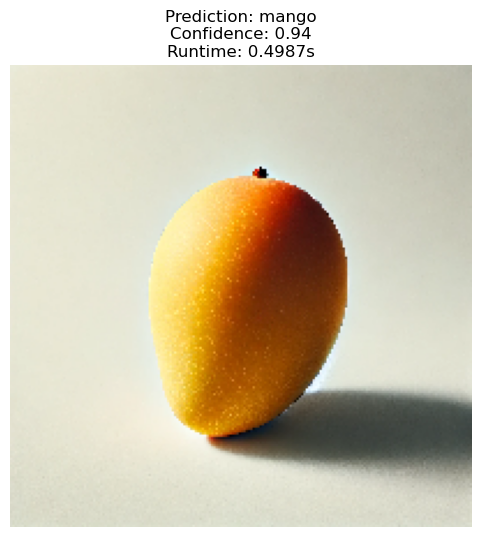

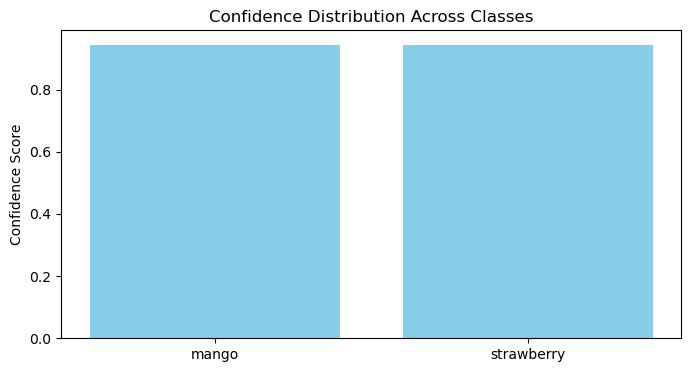

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Class: mango
Confidence Score: 0.29
Prediction Runtime: 0.4148 seconds


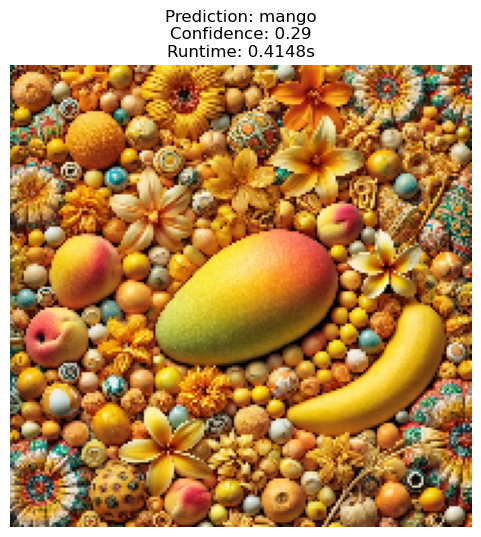

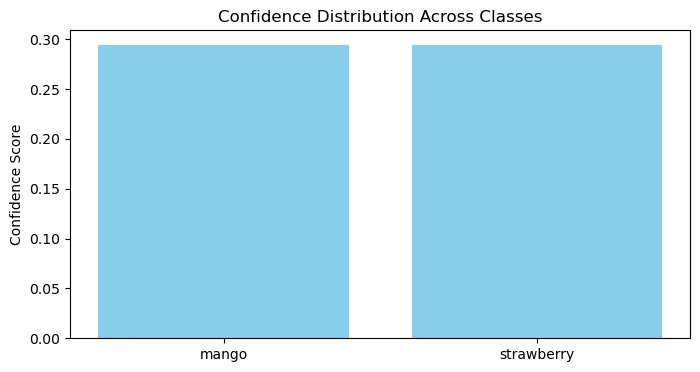

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Class: mango
Confidence Score: 0.99
Prediction Runtime: 0.2092 seconds


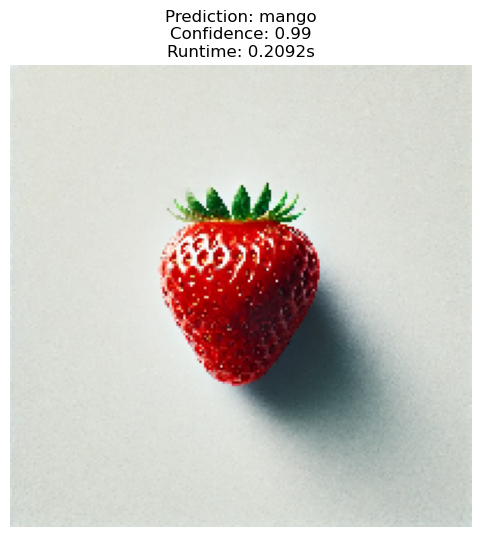

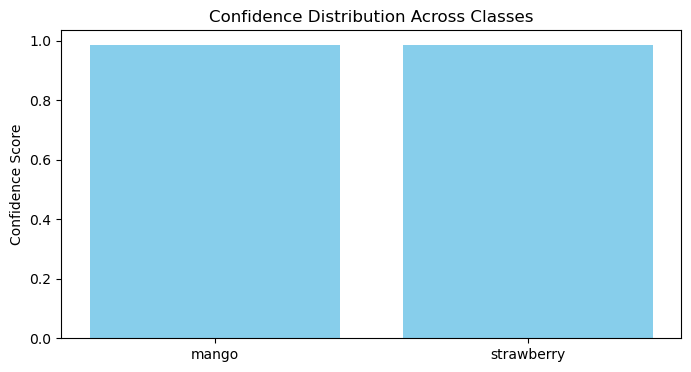

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted Class: mango
Confidence Score: 0.97
Prediction Runtime: 0.2282 seconds


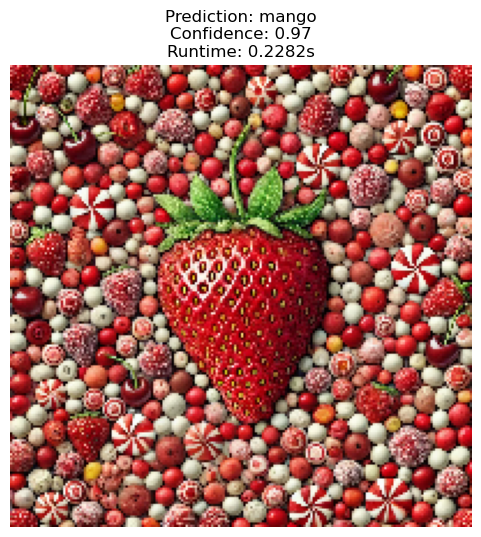

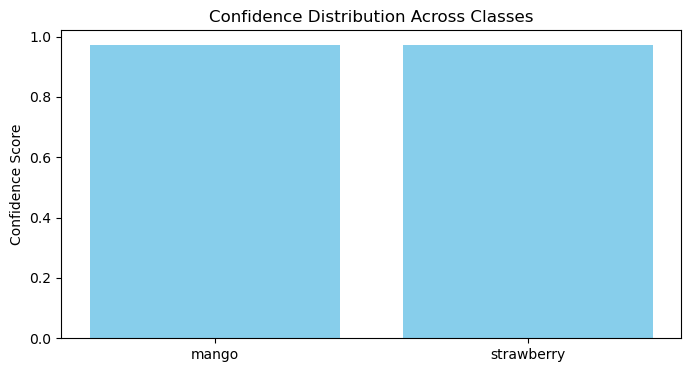

Testing individual images over vgg2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: mango
Confidence Score: 0.31
Prediction Runtime: 1.5306 seconds


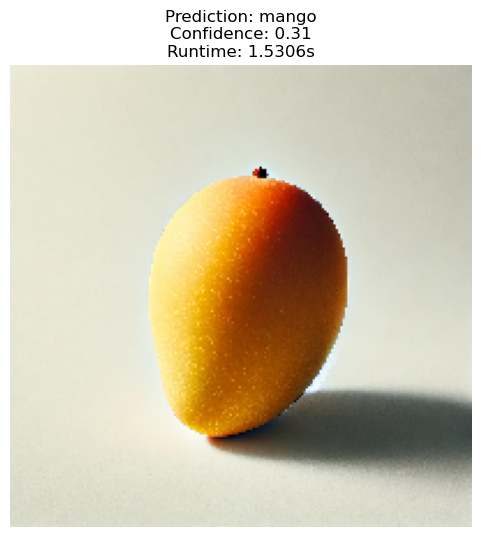

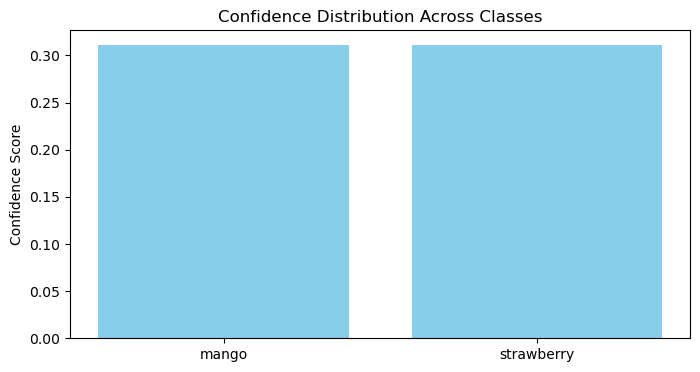

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Class: mango
Confidence Score: 0.00
Prediction Runtime: 0.2663 seconds


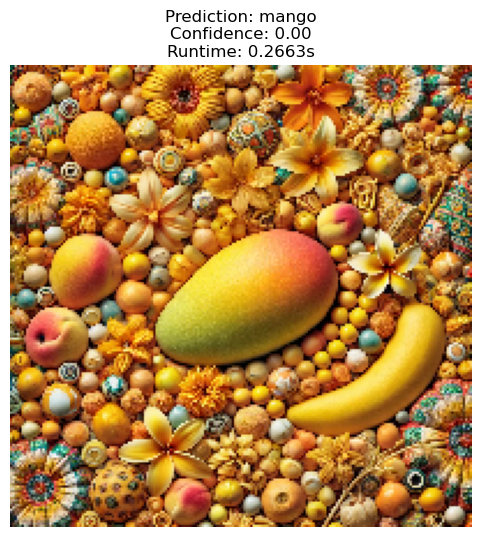

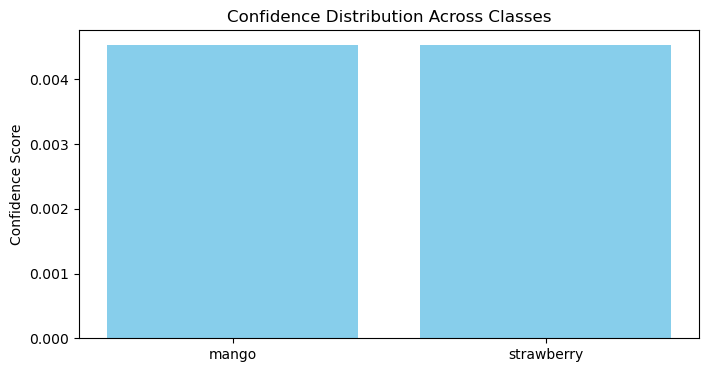

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Class: mango
Confidence Score: 0.96
Prediction Runtime: 0.1505 seconds


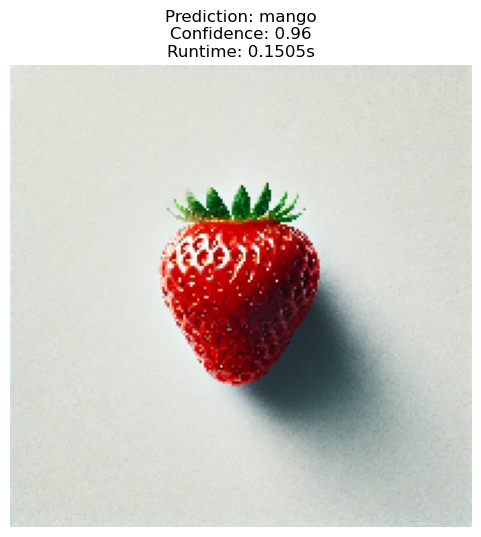

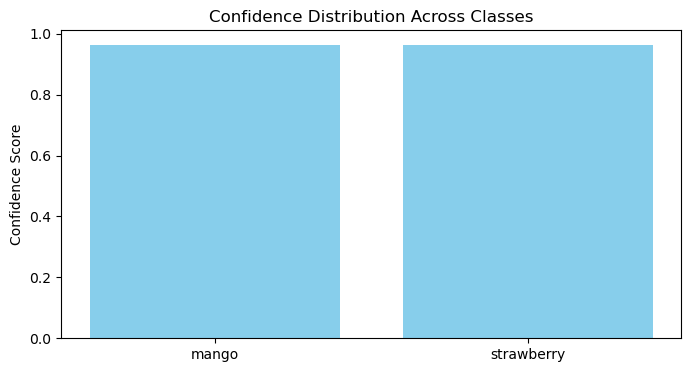

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Class: mango
Confidence Score: 0.85
Prediction Runtime: 0.1436 seconds


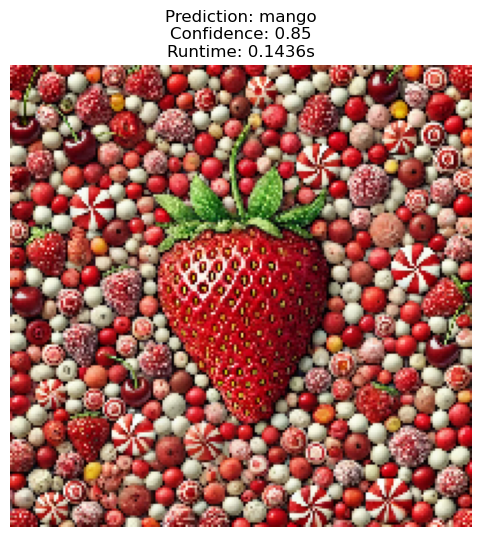

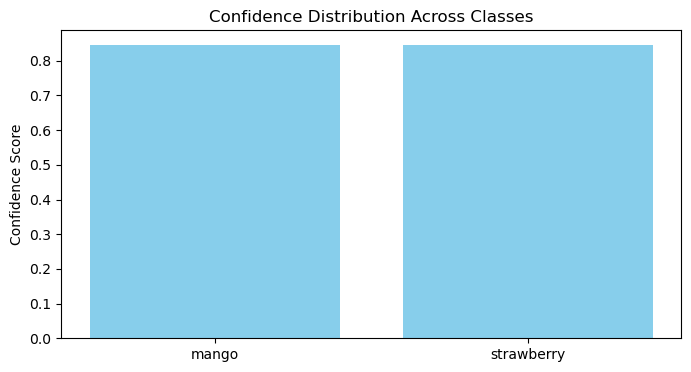

In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import time
import matplotlib.pyplot as plt

# Function to preprocess and evaluate a single image
def evaluate_single_image_with_analysis(model, image_path, target_size, class_names=None):
    """
    Evaluates a trained model on a single image with performance analysis.

    Parameters:
    - model: Trained Keras/TensorFlow model.
    - image_path: Path to the image file to evaluate.
    - target_size: Tuple (height, width) to resize the image.
    - class_names: List of class names for mapping predictions to labels (optional).

    Returns:
    - Dictionary with predicted class, confidence score, and runtime.
    """
    # Load the image
    img = load_img(image_path, target_size=target_size)  # Resize image
    img_array = img_to_array(img)  # Convert to NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Start timing
    start_time = time.time()
    # Make the prediction
    predictions = model.predict(img_array)
    runtime = time.time() - start_time  # Measure prediction time

    # Get confidence and class index
    confidence_scores = predictions[0]  # Assuming binary classification or softmax output
    predicted_class_index = np.argmax(confidence_scores)  # Index of the highest confidence score
    predicted_class_confidence = confidence_scores[predicted_class_index]

    # Map to class name if available
    predicted_class_name = class_names[predicted_class_index] if class_names else predicted_class_index

    # Return results and performance metrics
    result = {
        "predicted_class": predicted_class_name,
        "confidence_score": predicted_class_confidence,
        "runtime": runtime,
        "confidence_distribution": confidence_scores,
    }
    return result, img

# Visualization Function
def plot_image_with_prediction(img, result, class_names=None):
    """
    Plots the image along with the prediction and confidence scores.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    title = f"Prediction: {result['predicted_class']}\nConfidence: {result['confidence_score']:.2f}\nRuntime: {result['runtime']:.4f}s"
    plt.title(title, fontsize=12)
    plt.show()

    if class_names:
        plt.figure(figsize=(8, 4))
        plt.bar(class_names, result["confidence_distribution"], color='skyblue')
        plt.title("Confidence Distribution Across Classes")
        plt.ylabel("Confidence Score")
        plt.show()

def performing_analysis_over_single_image(model,image_path):
    
    target_size = (200, 200)
    # Evaluate the image
    result, img = evaluate_single_image_with_analysis(model, image_path, target_size, class_names)

    # Print detailed analysis
    print(f"Predicted Class: {result['predicted_class']}")
    print(f"Confidence Score: {result['confidence_score']:.2f}")
    print(f"Prediction Runtime: {result['runtime']:.4f} seconds")

    # Visualize
    plot_image_with_prediction(img, result, class_names)

# Path to the image
home="E:/ML/ML assignments/ML-assignment-4/individual images to test"
mango_hard=home+"/mango_hard.jpg"
mango_easy=home+"/mango_easy.jpg"
sb_hard=home+"/sb_hard.jpg"
sb_easy=home+"/sb_easy.jpg"
    

# Class names (optional)
class_names = ["mango", "strawberry"]  # Replace with actual class names

    # Target input size for the model
target_size = (200, 200)

print("Testing individual images over vgg1")
performing_analysis_over_single_image(vgg1,mango_easy)
performing_analysis_over_single_image(vgg1,mango_hard)
performing_analysis_over_single_image(vgg1,sb_easy)
performing_analysis_over_single_image(vgg1,sb_hard)

print("Testing individual images over vgg2")
performing_analysis_over_single_image(vgg2,mango_easy)
performing_analysis_over_single_image(vgg2,mango_hard)
performing_analysis_over_single_image(vgg2,sb_easy)
performing_analysis_over_single_image(vgg2,sb_hard)



